# 와인 데이터
# 주성분 분석(PCA)

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
wine = load_wine()
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data) # 표준 정규분포로 전환
from sklearn.decomposition import PCA ## 대문자니까 클래스이다
pca = PCA(n_components=4) # 주성분을 몇개로 할거냐 회귀선 두개로 할거다. 
pca2 = PCA(n_components=2)

In [83]:
wine_pca2 = pca2.fit_transform(wine_std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
wine_pca = pca.fit_transform(wine_std) # 데이터 변환을 해주는것은 핏 트랜스 폼이다
pca.explained_variance_ratio_,pca2.explained_variance_ratio_

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]),
 array([0.36198848, 0.1920749 ]))

PCA 전후 분류

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
## 원본데이터
X_train,X_test,y_train,y_test = train_test_split(
 wine.data,wine.target,stratify=wine.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [85]:
## PCA 데이터(2차원)로 분류 
X_train,X_test,y_train,y_test = train_test_split(
 wine_pca2,wine.target,stratify=wine.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9111111111111111

In [86]:
## PCA 데이터(4차원)로 분류 
X_train,X_test,y_train,y_test = train_test_split(
 wine_pca,wine.target,stratify=wine.target,random_state=2021    
)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9111111111111111

- PCA 데이터 시각화

In [79]:
df = pd.DataFrame(wine_pca2, columns=['PC1','PC2'])
df['target'] = wine.target
df.head(5)

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


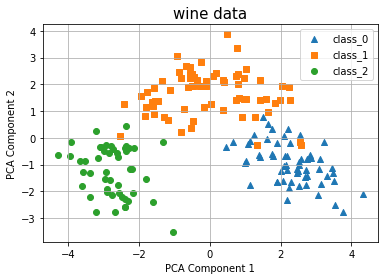

In [78]:
markers = ['^','s','o'] # Setosa-세모 , Versicolor-네모 , virginica-동그라미
df['PC1'] = wine_pca[:,0]
df['PC2'] = wine_pca[:,1]
df.head(3)

for i,marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,
                label=wine.target_names[i])
plt.legend() # 범례
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title('wine data',fontsize = 15)
plt.grid()
plt.show()

### 군집화

In [77]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3,random_state=2021)
Kmeans.fit(wine_std)
Kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

- 오리지널과군집화 비교

In [90]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['PC1'] = wine_pca[:,[0]]
df['PC2'] = wine_pca[:,[1]]
df['target'] = wine.target
df['cluster'] = Kmeans.labels_
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,PC1,PC2,target,cluster
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,-3.370524,-2.216289,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,-2.601956,-1.757229,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,-2.677839,-2.760899,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,-2.387017,-2.297347,2,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,-3.208758,-2.768920,2,2


- 오리지날 과 군집화 비교

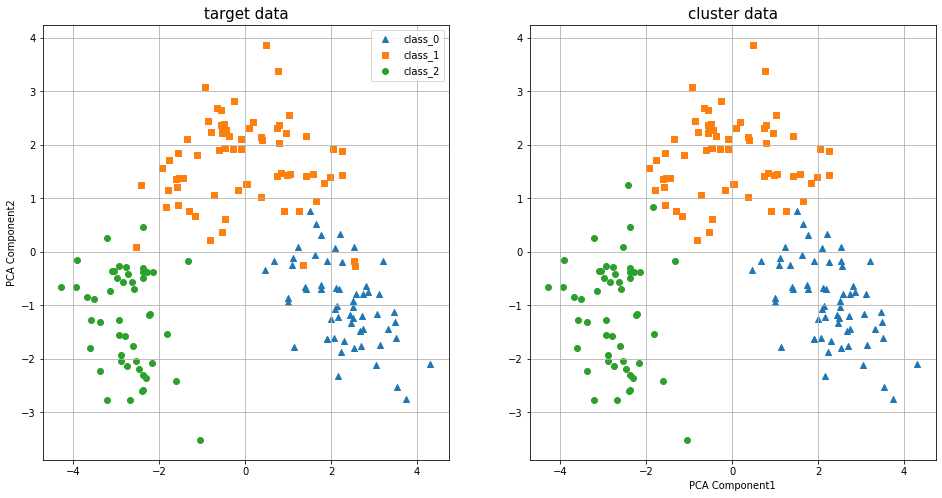

In [94]:
markers = ['^','s','o']
# for i in range(3):
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i,marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data,y_axis_data,marker=marker,label=wine.target_names[i])
    if column =='target':
        ax.set_title(f'{column} data',fontsize=15)
        ax.set_ylabel('PCA Component2')
        ax.legend()
        ax.grid()
    elif column =='cluster':
        ax.set_title(f'{column} data',fontsize=15)
        ax.set_xlabel(f'PCA Component1')
        ax.grid()
plt.show()
